<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab2.4.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [58]:
iter = 100000
o_price = 1000000
mean_year = 0.05
std_year = 0.23
trading_day = 253
mean_day = mean_year/trading_day
std_day = std_year/math.sqrt(trading_day)

[-0.01014824  0.00578791  0.00870491 ... -0.01845615  0.01062699
 -0.00120192]
[-0.01014824 -0.00436032  0.00434459 ...  1.55047514  1.56110213
  1.55990021]


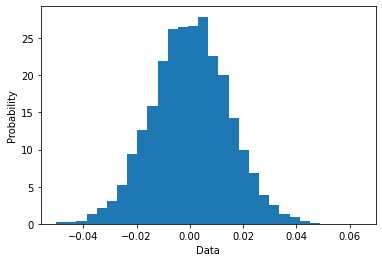

In [59]:
r = np.random.normal(loc=mean_day, scale=std_day, size=10000)
print(r)
cr = np.cumsum(r)
print(cr)
plt.hist(r, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()

In [60]:
# Problem 4
below = np.zeros(iter)
bottom_line = 950000
day = 45

for i in range(len(below)):
  r = np.random.normal(loc=mean_day, scale=std_day, size=day)
  logPrice = np.log(o_price) + np.cumsum(r)
  if logPrice.min() < np.log(bottom_line):
    below[i] = 1

print(below.mean())

0.50803


In [66]:
# Problem 5
above = np.zeros(iter)
celing = 1100000
bottom_line = 950000
day = 100

for i in range(len(above)):
  r = np.random.normal(loc=mean_day, scale=std_day, size=day)
  logPrice = np.log(o_price) + np.cumsum(r)
  for j in range(len(logPrice)):
    if logPrice[j] < np.log(bottom_line):
      break
    elif logPrice[j] > np.log(celing):
      above[i] = 1
      break

print(above.mean())

0.3904


In [69]:
# Problem 6
below = np.zeros(iter)
celing = 1100000
bottom_line = 950000
middle_line = 1000000
day = 100

for i in range(len(below)):
  flag = 0
  r = np.random.normal(loc=mean_day, scale=std_day, size=day)
  logPrice = np.log(o_price) + np.cumsum(r)
  for j in range(len(logPrice)):
    if logPrice[j] < np.log(bottom_line):
      below[i] = 1
      flag = 1
      break
    elif logPrice[j] > np.log(celing):
      flag = 1
      break
  if flag == 0 and logPrice[-1]< np.log(middle_line):
    below[i] = 1

print(below.mean())

0.58988


In [73]:
# Problem 7
profit = np.zeros(iter)
celing = 1100000
bottom_line = 950000
day = 100

for i in range(len(profit)):
  flag = 1
  r = np.random.normal(loc=mean_day, scale=std_day, size=day)
  logPrice = np.log(o_price) + np.cumsum(r)
  for j in range(len(logPrice)):
    if logPrice[j] < np.log(bottom_line):
      profit[i] = logPrice[j]
      flag = 1
      break
    elif logPrice[j] > np.log(celing):
      profit[i] = logPrice[j]
      flag = 1
      break
  if flag == 0:
    profit[i] = logPrice[-1]
  
print(np.exp(profit.mean()) - o_price)

-292676.36289204704


In [85]:
# Problem 8
log_return = np.zeros(iter)
date = np.zeros(iter)
invest = 50000
celing = 1100000
bottom_line = 950000
day = 100

for i in range(len(profit)):
  flag = 0
  r = np.random.normal(loc=mean_day, scale=std_day, size=day)
  logPrice = np.log(o_price) + np.cumsum(r)
  for j in range(len(logPrice)):
    if logPrice[j] < np.log(bottom_line):
      log_return[i] = logPrice[j]
      flag = 1
      date[i] = j+1
      break
    elif logPrice[j] > np.log(celing):
      log_return[i] = logPrice[j]
      flag = 1
      date[i] = j+1
      break
  if flag == 0:
    log_return[i] = logPrice[-1]
    date[i] = day

daily_log_return = (log_return - np.log(invest))/date
print(daily_log_return.mean())

0.20527994745675654
